# Phishing Websites


## About the Dataset
This dataset consists of 11055 training data set and 2456 testing data set. It has 30 attributes, namely, 
- having_IP_Address  { -1,1 }
- URL_Length   { 1,0,-1 } 
- Shortining_Service { 1,-1 } 
- having_At_Symbol   { 1,-1 } 
- double_slash_redirecting { -1,1 } 
- Prefix_Suffix  { -1,1 } 
- having_Sub_Domain  { -1,0,1 } 
- SSLfinal_State  { -1,1,0 } 
- Domain_registeration_length { -1,1 } 
- Favicon { 1,-1 } 
- port { 1,-1 } 
- HTTPS_token { -1,1 } 
- Request_URL  { 1,-1 } 
- URL_of_Anchor { -1,0,1 } 
- Links_in_tags { 1,-1,0 } 
- SFH  { -1,1,0 } 
- Submitting_to_email { -1,1 } 
- Abnormal_URL { -1,1 }
- Redirect  { 0,1 } 
- on_mouseover  { 1,-1 }
- RightClick  { 1,-1 } 
- popUpWidnow  { 1,-1 } 
- Iframe { 1,-1 } 
- age_of_domain  { -1,1 } 
- DNSRecord   { -1,1 } 
- web_traffic  { -1,0,1 } 
- Page_Rank { -1,1 } 
- Google_Index { 1,-1 } 
- Links_pointing_to_page { 1,0,-1 } 
- Statistical_report { -1,1 } 
- Result  { -1,1 } 

which they take on the values 1, 0, -1 that mean whether the website is either legitimate, suspicious or phishing, respectively.

###### The following segment of code just creates and duplicates the dataset in the .arff files. 

In [1]:
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

training dataset : 
number of samples_______ = 11055
number of negative ones_ = 4898
number of ones__________ = 6157


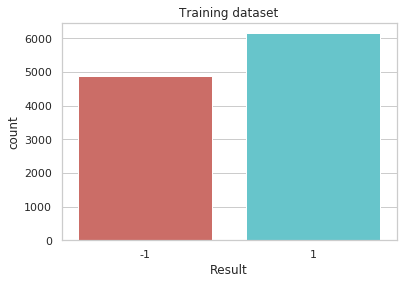

testing dataset : 
number of samples_______ = 2456
number of negative ones_ = 1362
number of ones__________ = 1094


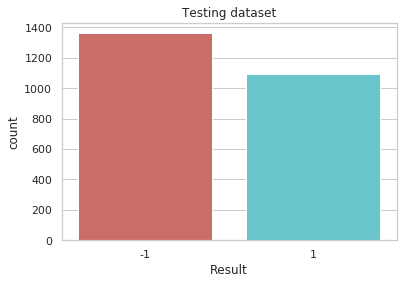

In [17]:
from math import *
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)


data_train = pd.read_csv('Training Dataset.csv', sep = ',')
data_test = pd.read_csv('old.csv', sep = ',')

feature_index_names = {0:'having_IP_Address', 1:'URL_Length', 2:'Shortining_Service', 3:'having_At_Symbol', 
                        4:'double_slash_redirecting', 5:'Prefix_Suffix', 6:'having_Sub_Domain', 7:'SSLfinal_State',
                        8:'Domain_registeration_length', 9:'Favicon', 10:'port', 11:'HTTPS_token',12:'Request_URL', 
                        13:'URL_of_Anchor', 14:'Links_in_tags', 15:'SFH', 16:'Submitting_to_email', 17:'Abnormal_URL', 
                        18:'Redirect', 19:'on_mouseover', 20:'RightClick', 21:'popUpWidnow', 22:'Iframe',
                        23:' age_of_domain', 24:'DNSRecord', 25:'web_traffic', 26:'Page_Rank', 27:' Google_Index', 
                        28:'Links_pointing_to_page', 29:'Statistical_report'} 
#training dataset
training_data = np.array(data_train)
x_training = training_data[:, :-1]
y_training = training_data[:, -1]

print('training dataset : ')
print('{:_<24s} = {:d}'.format('number of samples', y_training.shape[0]))
print('{:_<24s} = {:d}'.format('number of negative ones', np.sum(y_training == -1)))
print('{:_<24s} = {:d}'.format('number of ones', np.sum(y_training == 1)))

sns.countplot(x = 'Result', data = data_train, palette = 'hls')
plt.title('Training dataset')
plt.show()

#testing dataset
testing_data = np.array(data_test)
x_testing = testing_data[:, :-1]
y_testing = testing_data[:, -1]

print('testing dataset : ')
print('{:_<24s} = {:d}'.format('number of samples', y_testing.shape[0]))
print('{:_<24s} = {:d}'.format('number of negative ones', np.sum(y_testing == -1)))
print('{:_<24s} = {:d}'.format('number of ones', np.sum(y_testing == 1)))
sns.countplot(x = 'Result', data = data_test, palette = 'hls')
plt.title('Testing dataset')
plt.show()



### Logistic Regression 

We can also use logistic regression to perform occupancy detection. In order to achieve this, first we need to define our hypothesis (or model):
$$
\begin{array}{rcl}
h_{\boldsymbol{\Theta}}(\mathbf{x}) & = & \frac{1}{1 + e^{-(\theta_{0} x_{0} + \theta_{1} x_{1} + \cdots + \theta_{d} x_{d})}} \\
& = & \frac{1}{1 + e^{-\mathbf{x} \boldsymbol{\Theta}^{T}}},
\end{array}
$$
where $\mathbf{x} = [x_{0}, x_{1}, \ldots, x_{d}]$, $\boldsymbol{\Theta}=[\theta_{0}, \theta_{1}, \ldots, \theta_{d}]$ and $x_{0} = 1$. 

The following function implements this model, which assumes that all vectors are row-major.

In [3]:
def h(x, theta):
    s = np.dot(x, theta.T)
    u = 1.0 / (1.0 + np.exp(-s))
    return u

Now, we need to define our loss function to learn the parameters of the model based on training dataset. We can use mean square error as our loss function, i.e.,

$$
J\left(\boldsymbol{\Theta}\right) = \frac{1}{2 N} \sum\limits_{n=1}^{N} \left(h_{ \boldsymbol{\Theta}}\left(\mathbf{x}^{\left(n\right)}\right) - y^{\left(n\right)} \right)^2 = \frac{1}{N} \sum\limits_{n=1}^{N}Cost\left(h_{ \boldsymbol{\Theta}}\left(\mathbf{x}^{\left(n\right)}\right) , y^{\left(n\right)}\right).
$$

The following function implements the loss function $J\left(\boldsymbol{\Theta}\right)$.

In [4]:
def J(x, y, theta):
    N = y.shape[0]
    mse = 1.0 / (2*N) * np.sum((h(x, theta) - y)**2)
    return mse

Now, we need implement gradient descent solver to learn the parameters $\boldsymbol{\Theta}$ of our model. The following function implements batch gradient descent to learn the parameters $\boldsymbol{\Theta}$ on the training dataset.

In [5]:
def bgd(x, y, theta, alpha=0.00155, epsilon=0.001, max_iter=1000):
    y = y[:, np.newaxis]
    N = y.shape[0]
    t = 0
    while True:
        # print the value of loss function for each iteration
        print('iteration #{:>8d}, loss = {:>8f}'.format(t, J(x,y,theta)))
        # keep a copy of the parameter vector before the update for checking the convergence criterion
        theta_previous = theta.copy()
        # update the parameter vector
        e = (h(x, theta) - y)
        theta  = theta - alpha * 1.0 / N * np.sum( e * x, axis=0)
        t = t + 1
        # check the convergence criterion
        if (np.max(np.abs(theta-theta_previous)) < epsilon) or (t>max_iter):
            break
    return theta

Now we normalize the data

In [6]:
m = np.mean(x_training, axis=0)
s = np.std(x_training, axis=0)
x_training = (x_training - m) / s
x_testing = (x_testing - m) / s

Augment training and testing vector to take advantage of fast matrix operations in NumPy.

In [7]:
x_training_aug = np.hstack((np.ones((x_training.shape[0],1)), x_training))
x_testing_aug = np.hstack((np.ones((x_testing.shape[0],1)), x_testing))

Create a random parameter vector and learn the parameters

In [8]:
theta = np.random.randn(1, x_training_aug.shape[1])
theta = bgd(x_training_aug, y_training, theta)

iteration #       0, loss = 0.727020
iteration #       1, loss = 0.726745
iteration #       2, loss = 0.726469
iteration #       3, loss = 0.726194
iteration #       4, loss = 0.725919
iteration #       5, loss = 0.725643
iteration #       6, loss = 0.725367
iteration #       7, loss = 0.725092
iteration #       8, loss = 0.724816
iteration #       9, loss = 0.724540
iteration #      10, loss = 0.724265
iteration #      11, loss = 0.723989
iteration #      12, loss = 0.723713
iteration #      13, loss = 0.723437
iteration #      14, loss = 0.723161
iteration #      15, loss = 0.722885
iteration #      16, loss = 0.722609
iteration #      17, loss = 0.722333
iteration #      18, loss = 0.722057
iteration #      19, loss = 0.721781
iteration #      20, loss = 0.721504
iteration #      21, loss = 0.721228
iteration #      22, loss = 0.720952
iteration #      23, loss = 0.720675
iteration #      24, loss = 0.720399
iteration #      25, loss = 0.720122
iteration #      26, loss = 0.719846
i

iteration #     306, loss = 0.642088
iteration #     307, loss = 0.641814
iteration #     308, loss = 0.641541
iteration #     309, loss = 0.641268
iteration #     310, loss = 0.640994
iteration #     311, loss = 0.640721
iteration #     312, loss = 0.640448
iteration #     313, loss = 0.640175
iteration #     314, loss = 0.639902
iteration #     315, loss = 0.639629
iteration #     316, loss = 0.639356
iteration #     317, loss = 0.639083
iteration #     318, loss = 0.638811
iteration #     319, loss = 0.638538
iteration #     320, loss = 0.638265
iteration #     321, loss = 0.637993
iteration #     322, loss = 0.637720
iteration #     323, loss = 0.637448
iteration #     324, loss = 0.637176
iteration #     325, loss = 0.636903
iteration #     326, loss = 0.636631
iteration #     327, loss = 0.636359
iteration #     328, loss = 0.636087
iteration #     329, loss = 0.635815
iteration #     330, loss = 0.635543
iteration #     331, loss = 0.635272
iteration #     332, loss = 0.635000
i

iteration #     631, loss = 0.558696
iteration #     632, loss = 0.558461
iteration #     633, loss = 0.558227
iteration #     634, loss = 0.557993
iteration #     635, loss = 0.557759
iteration #     636, loss = 0.557525
iteration #     637, loss = 0.557292
iteration #     638, loss = 0.557058
iteration #     639, loss = 0.556825
iteration #     640, loss = 0.556592
iteration #     641, loss = 0.556359
iteration #     642, loss = 0.556126
iteration #     643, loss = 0.555893
iteration #     644, loss = 0.555661
iteration #     645, loss = 0.555428
iteration #     646, loss = 0.555196
iteration #     647, loss = 0.554964
iteration #     648, loss = 0.554732
iteration #     649, loss = 0.554501
iteration #     650, loss = 0.554269
iteration #     651, loss = 0.554038
iteration #     652, loss = 0.553807
iteration #     653, loss = 0.553576
iteration #     654, loss = 0.553345
iteration #     655, loss = 0.553114
iteration #     656, loss = 0.552883
iteration #     657, loss = 0.552653
i

After the parameters are learned, we can test the performance of the classifier. Note that logistic regression returns a number in [0,1], thus we need to binarize it.

In [9]:
y_prediction = (h(x_testing_aug, theta)>=0.5)[:,0]
test_error = np.sum(y_testing != y_prediction) / y_testing.shape[0]
print('logistic regression test error = {:.4f}'.format(test_error))

logistic regression test error = 0.6417


In [13]:
print(feature_index_names[0].value_counts)

AttributeError: 'str' object has no attribute 'value_counts'